# DA Mini Project
주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석  

목적 : 이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.¶


 온라인 학습플랫폼이 토익, 자격증과 같은 단기 학습 위주의 플랫폼이라고 가정

가설 : 중단된 학습 세션 수가  적을 수록 학습성취도가 높고 단기간에 성적을 낼 수 있어서 연장을 하지 않을 것으로 예상 

## 요구사항 분석

누가 구독을 연장할지 예측하기 위한 사적 파악을 위해서 현재 구독을 연장한 사람들의 데이터를 토대로 어떠한 공통점이 있는지 파악.  
target데이터를 적극적으로 이용하여 사람들의 공통적인 행동패턴 찾기 (구독을 연장한 target = 1 인 사람들과 구독을 연장하지 않은 target = 0인 사람들의 행동 패턴 비교)

미션1) 
1. 최근 학업 성취도와 중단된 학습 세션 수의 상관관계 비교
2. target과 payment_pattern 를 이용하여 다음달에 연장을 한 사람들(target = 1)중에서 결제 패턴과 학업성취도, 중단된 학습 세션 수에 특이점이 있는지 확인

In [6]:
import pandas as pd

In [7]:
access_data = pd.read_table('C:/workspace/WASSUP4/05_Data_Analysis/data/mini.csv', sep=',')

In [8]:
access_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [9]:
access_data.tail()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1
9999,e12dcb55,10,5,13.073230,28.120031,3,13,64.811297,4,5,Low,Premium,0,3,0


In [10]:
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [11]:
access_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


## 데이터 분석 1회차

In [12]:
# target이 1일 때 특징 찾아보기
target_1_data = access_data[access_data['target'] == 1]
target_1_data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
6,682ca511,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9ee4e40c,11,6,11.187836,88.757610,6,9,77.335911,5,4,High,Basic,1,4,1
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1


In [13]:
# target이 0일 때 특징 찾아보기
target_0_data = access_data[access_data['target'] == 0]
target_0_data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
10,594da7eb,19,21,13.953449,135.256834,13,11,76.414481,0,4,High,Basic,2,1,0
11,b8696d56,5,28,18.474545,117.134599,9,9,97.786237,6,3,Medium,Premium,2,3,0
14,aba89783,2,27,10.303337,2.712124,20,8,82.491912,4,5,Low,Basic,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,0d22254f,12,18,11.709882,40.075854,4,13,77.026299,2,2,High,Basic,2,3,0
9983,f2757504,22,23,16.739713,6.047050,15,9,64.817228,4,5,Medium,Basic,2,3,0
9987,ec7013a5,21,7,17.466408,160.590536,14,14,76.861836,4,5,Medium,Premium,2,2,0
9989,039902b7,5,23,10.607962,21.655545,9,9,57.110845,1,2,Low,Basic,1,3,0


In [14]:
payment_pattern_data = target_1_data.groupby('payment_pattern')[['abandoned_learning_sessions','recent_learning_achievement']].mean()
payment_pattern_data

,abandoned_learning_sessions,recent_learning_achievement
payment_pattern,,
0,2.873606,74.753908
1,3.051086,75.058431
2,3.113788,75.932448
3,3.062910,74.506577
4,2.945551,75.034074
5,3.040000,74.988987
6,3.039950,75.006099
7,3.013836,75.131386


In [15]:
recent_learning_achievement_data = target_1_data.groupby('recent_learning_achievement')[['abandoned_learning_sessions','payment_pattern']].mean()
recent_learning_achievement_data

,abandoned_learning_sessions,payment_pattern
recent_learning_achievement,,
36.115562,4.0,5.0
36.830979,0.0,6.0
42.430858,2.0,2.0
42.870248,4.0,4.0
42.970217,2.0,2.0
...,...,...
106.102230,3.0,3.0
108.127099,3.0,2.0
109.686851,4.0,2.0


In [16]:
# target이 1인 학생들 중에서 최근 학습 성취도와 중단된 세선 수를 가지고 payment_pattern 분석
selected_1_data = target_1_data[['recent_learning_achievement', 'abandoned_learning_sessions','payment_pattern']]
selected_1_data = selected_1_data.sort_values(by='recent_learning_achievement')
selected_1_data

,recent_learning_achievement,abandoned_learning_sessions,payment_pattern
1249,36.115562,4,5
8299,36.830979,0,6
355,42.430858,2,2
55,42.870248,4,4
8726,42.970217,2,2
...,...,...,...
1591,106.102230,3,3
7148,108.127099,3,2
8394,109.686851,4,2
2561,111.219647,2,2


In [17]:
# target이 0인 학생들 중에서 최근 학습 성취도와 중단된 세선 수를 가지고 payment_pattern 분석
selected_0_data = target_0_data[['recent_learning_achievement', 'abandoned_learning_sessions','payment_pattern']]
selected_0_data = selected_0_data.sort_values(by='recent_learning_achievement')
selected_0_data

,recent_learning_achievement,abandoned_learning_sessions,payment_pattern
3964,35.941755,2,2
3567,41.752942,2,4
4781,42.254863,3,2
3755,43.068185,3,7
1017,43.733914,7,3
...,...,...,...
7981,104.812784,6,3
4289,105.074082,4,7
2274,106.385512,1,0
7861,106.942927,2,3


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [136]:
# 결제 패턴에서 0,1달 결제한 그룹과 2달 이상 결제한 그룹을 나눠서 각 그룹들의 target 1 의 비율을  구해보자
# 각 그룹으로 payment_pattern을 나누기
group_1 = access_data[access_data['payment_pattern'].isin([0, 1, 2, 4])]
group_2 = access_data[access_data['payment_pattern'].isin([3, 5, 6, 7])]

# 각 그룹의 target == 1인 비율 계산
group_1_target_1_ratio = group_1[group_1['target'] == 1].shape[0] / group_1.shape[0] * 100
group_2_target_1_ratio = group_2[group_2['target'] == 1].shape[0] / group_2.shape[0] * 100

print(group_1_target_1_ratio)
print(group_2_target_1_ratio)

# result_table = pd.DataFrame({
#     'Payment Pattern Group': ['0, 1, 2, 4', '3, 5, 6, 7'],
#     'Target 1 Ratio (%)': [group_1_target_1_ratio, group_2_target_1_ratio]
# })

# print(result_table)

62.048192771084345
61.932270916334666


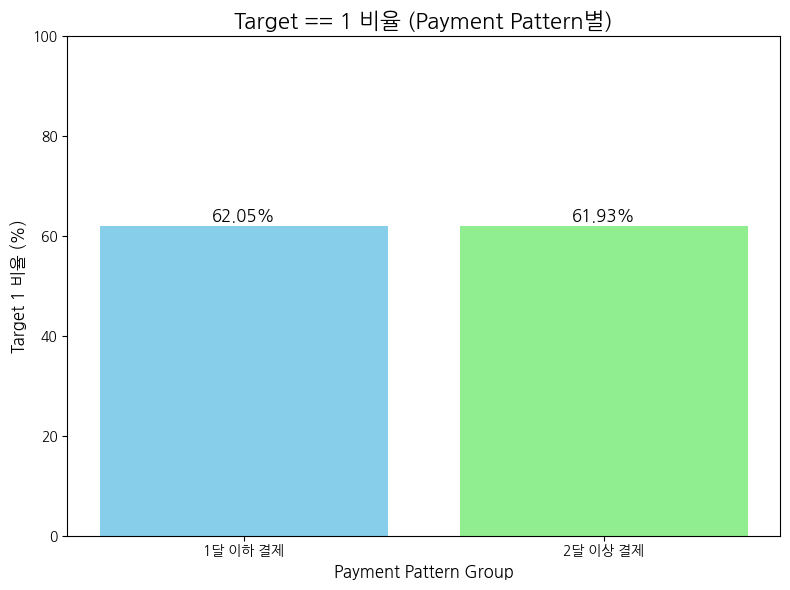

In [138]:
groups = ['1달 이하 결제', '2달 이상 결제']
ratios = [group_1_target_1_ratio, group_2_target_1_ratio]

plt.figure(figsize=(8, 6))
plt.bar(groups, ratios, color=['skyblue', 'lightgreen'])


plt.title('Target == 1 비율 (Payment Pattern별)', fontsize=16)
plt.xlabel('Payment Pattern Group', fontsize=12)
plt.ylabel('Target 1 비율 (%)', fontsize=12)

# y축 범위 설정 (0에서 100까지)
plt.ylim(0, 100)

# 값 표시
for i, ratio in enumerate(ratios):
    plt.text(i, ratio + 1, f'{ratio:.2f}%', ha='center', fontsize=12)

# 그래프 표시
plt.tight_layout()
plt.show()


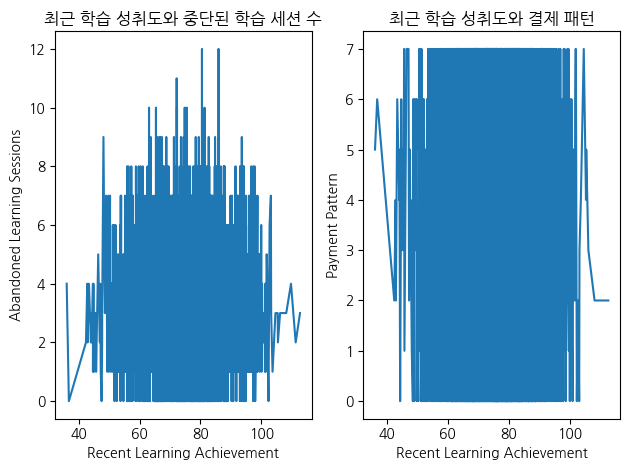

In [19]:
# abandoned_learning_sessions 시각화 (target = 1)
plt.subplot(1, 2, 1)
sns.lineplot(data=selected_1_data, x='recent_learning_achievement', y='abandoned_learning_sessions')
plt.title('최근 학습 성취도와 중단된 학습 세션 수')
plt.xlabel('Recent Learning Achievement')
plt.ylabel('Abandoned Learning Sessions')

# payment_pattern 시각화
plt.subplot(1, 2, 2)
sns.lineplot(data=selected_1_data, x='recent_learning_achievement', y='payment_pattern')
plt.title('최근 학습 성취도와 결제 패턴')
plt.xlabel('Recent Learning Achievement')
plt.ylabel('Payment Pattern')

plt.tight_layout()
plt.show()

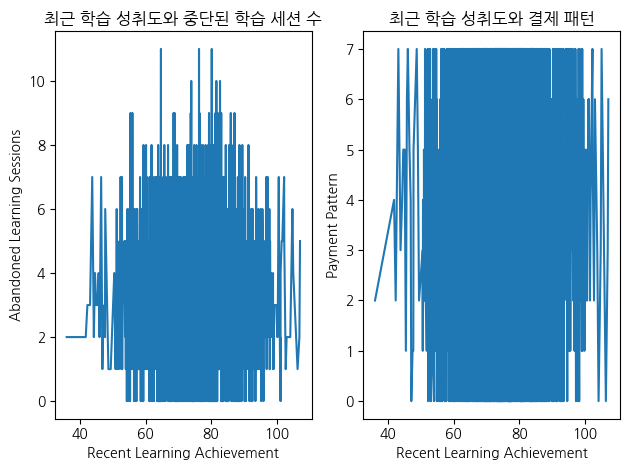

In [20]:
# abandoned_learning_sessions 시각화  (target = 0)
plt.subplot(1, 2, 1)
sns.lineplot(data=selected_0_data, x='recent_learning_achievement', y='abandoned_learning_sessions')
plt.title('최근 학습 성취도와 중단된 학습 세션 수')
plt.xlabel('Recent Learning Achievement')
plt.ylabel('Abandoned Learning Sessions')

# payment_pattern 시각화
plt.subplot(1, 2, 2)
sns.lineplot(data=selected_0_data, x='recent_learning_achievement', y='payment_pattern')
plt.title('최근 학습 성취도와 결제 패턴')
plt.xlabel('Recent Learning Achievement')
plt.ylabel('Payment Pattern')

plt.tight_layout()
plt.show()

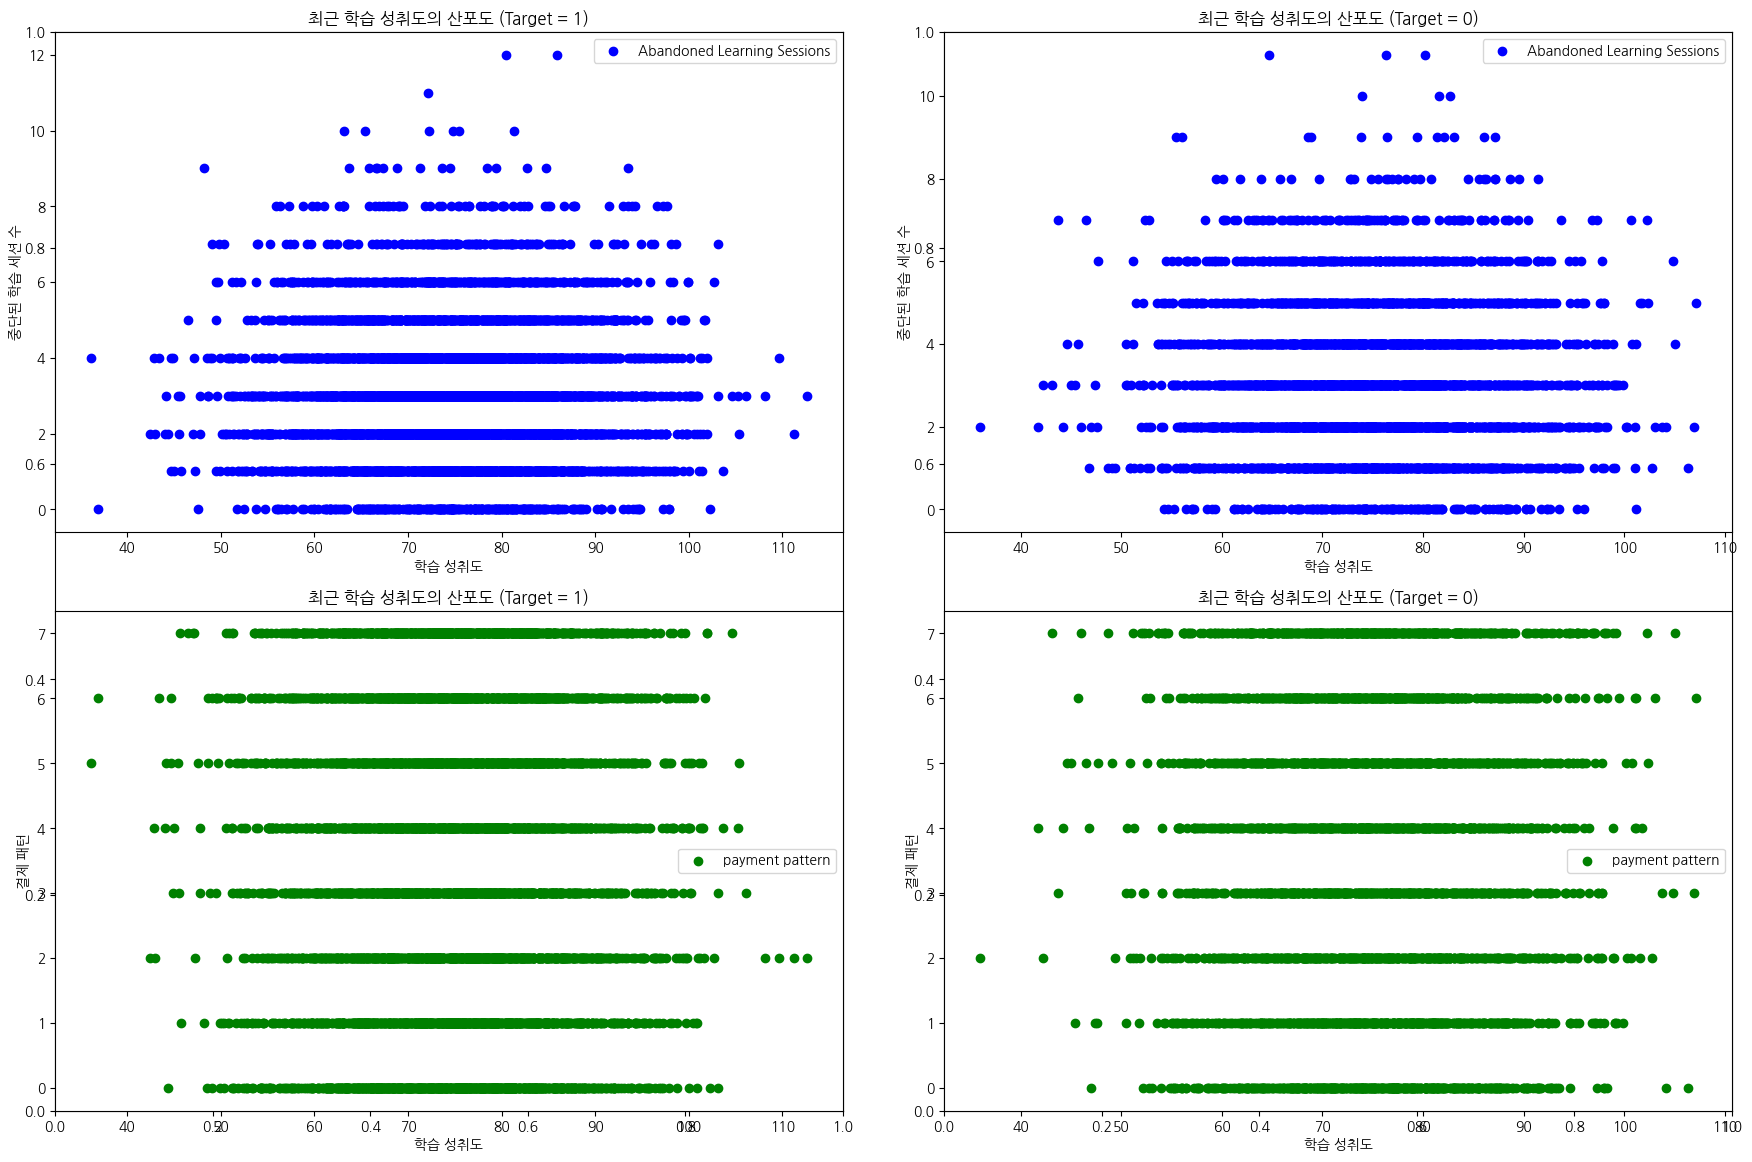

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.scatter(selected_1_data['recent_learning_achievement'], selected_1_data['abandoned_learning_sessions'], c='blue', label='Abandoned Learning Sessions')
plt.title('최근 학습 성취도의 산포도 (Target = 1)')
plt.xlabel('학습 성취도')
plt.ylabel('중단된 학습 세션 수')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(selected_0_data['recent_learning_achievement'], selected_0_data['abandoned_learning_sessions'], c='blue', label='Abandoned Learning Sessions')
plt.title('최근 학습 성취도의 산포도 (Target = 0)')
plt.xlabel('학습 성취도')
plt.ylabel('중단된 학습 세션 수')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(selected_1_data['recent_learning_achievement'], selected_1_data['payment_pattern'], c='green', label='payment pattern')
plt.title('최근 학습 성취도의 산포도 (Target = 1)')
plt.xlabel('학습 성취도')
plt.ylabel('결제 패턴')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(selected_0_data['recent_learning_achievement'], selected_0_data['payment_pattern'], c='green', label='payment pattern')
plt.title('최근 학습 성취도의 산포도 (Target = 0)')
plt.xlabel('학습 성취도')
plt.ylabel('결제 패턴')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
# target이 1일 때 중단된 학습 세션수와 결제 패턴의 그룹바이
aband_pay_1_data = target_1_data.groupby(['abandoned_learning_sessions', 'payment_pattern']).size().reset_index(name='count')
aband_pay_1_data

,abandoned_learning_sessions,payment_pattern,count
0,0,0,43
1,0,1,28
2,0,2,34
3,0,3,33
4,0,4,39
...,...,...,...
80,10,6,2
81,10,7,1
82,11,6,1
83,12,2,1


In [23]:
# target이 0일 때 중단된 학습 세션수와 결제 패턴의 그룹바이
aband_pay_0_data = target_0_data.groupby(['abandoned_learning_sessions', 'payment_pattern']).size().reset_index(name='count')
aband_pay_0_data

,abandoned_learning_sessions,payment_pattern,count
0,0,0,18
1,0,1,26
2,0,2,17
3,0,3,17
4,0,4,21
...,...,...,...
77,10,0,1
78,10,4,1
79,10,7,1
80,11,3,1


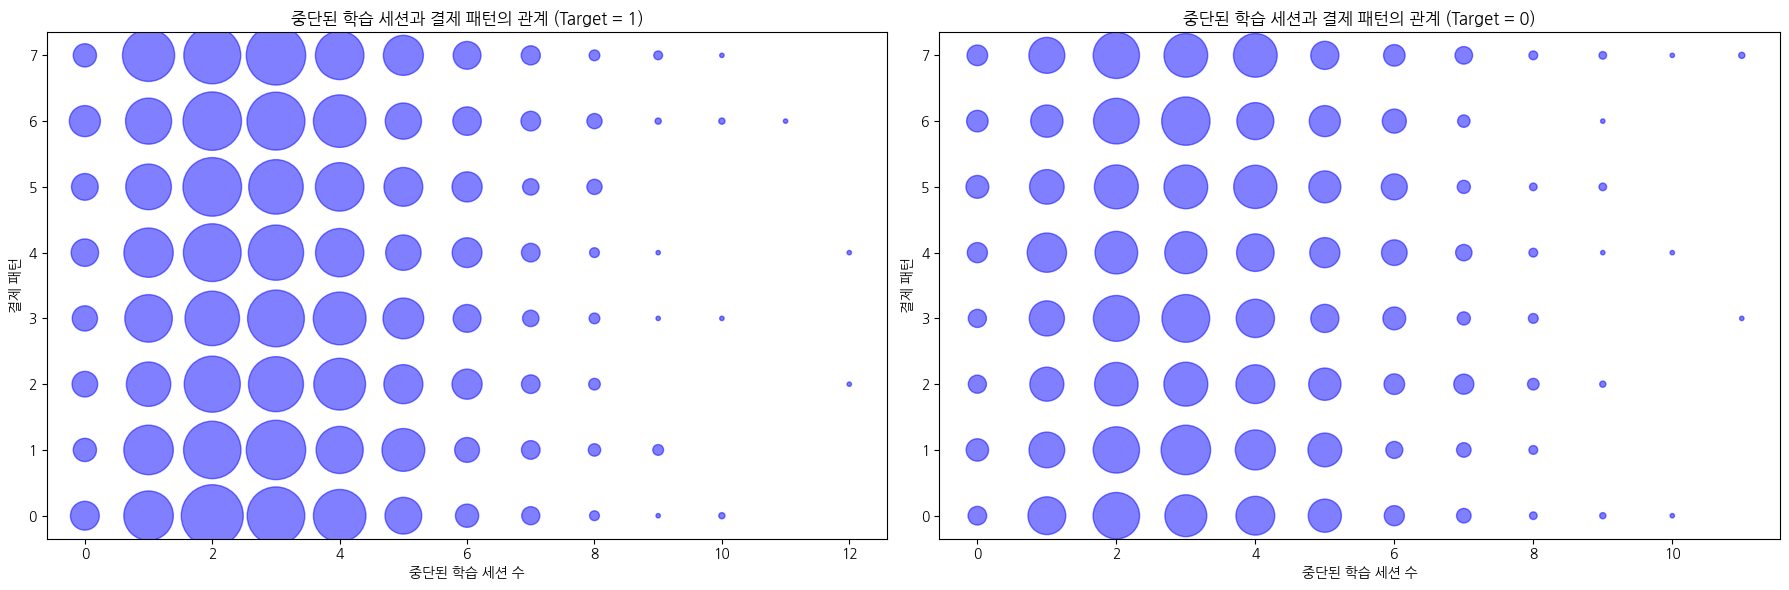

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(aband_pay_1_data['abandoned_learning_sessions'], aband_pay_1_data['payment_pattern'], 
            s=aband_pay_1_data['count']*10, c='blue', alpha=0.5)
plt.title('중단된 학습 세션과 결제 패턴의 관계 (Target = 1)')
plt.xlabel('중단된 학습 세션 수')
plt.ylabel('결제 패턴')


plt.subplot(1, 2, 2)
plt.scatter(aband_pay_0_data['abandoned_learning_sessions'], aband_pay_0_data['payment_pattern'], 
            s=aband_pay_0_data['count']*10, c='blue', alpha=0.5)
plt.title('중단된 학습 세션과 결제 패턴의 관계 (Target = 0)')
plt.xlabel('중단된 학습 세션 수')
plt.ylabel('결제 패턴')

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

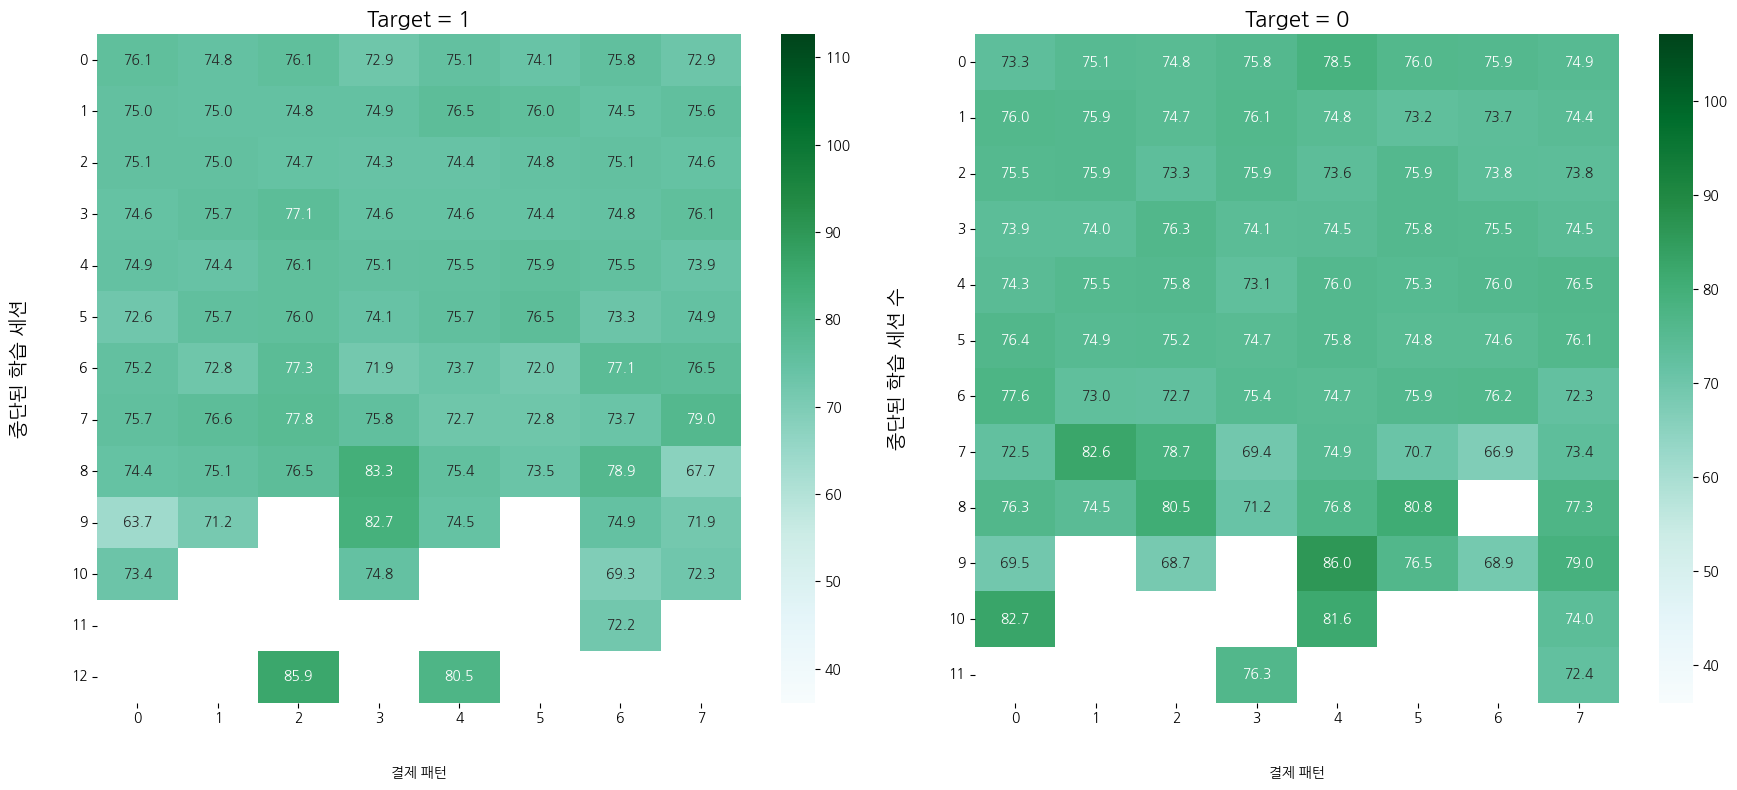

In [96]:
# 피벗 테이블 생성
pivot_1_table = selected_1_data.pivot_table(values='recent_learning_achievement', 
                                        index='abandoned_learning_sessions', 
                                        columns='payment_pattern')


pivot_0_table = selected_0_data.pivot_table(values='recent_learning_achievement', 
                                        index='abandoned_learning_sessions', 
                                        columns='payment_pattern')


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8)) 


plt.subplot(1, 2, 1)
sns.heatmap(data=pivot_1_table,
            annot=True,  
            fmt='.1f',   
            vmin=selected_1_data['recent_learning_achievement'].min(), 
            vmax=selected_1_data['recent_learning_achievement'].max(),  
            cmap="BuGn"
           )
plt.xlabel('결제 패턴', fontsize=10, labelpad=30)
plt.ylabel('중단된 학습 세션', fontsize=14, labelpad=30)
plt.title('Target = 1', fontsize=16)
plt.tick_params(axis='y', rotation=0)


plt.subplot(1, 2, 2)
sns.heatmap(data=pivot_0_table,
            annot=True,  
            fmt='.1f',   
            vmin=selected_0_data['recent_learning_achievement'].min(),  
            vmax=selected_0_data['recent_learning_achievement'].max(),  
            cmap="BuGn"
           )
plt.xlabel('결제 패턴', fontsize=10, labelpad=30)
plt.ylabel('중단된 학습 세션 수', fontsize=14, labelpad=30)
plt.title('Target = 0', fontsize=16)
plt.tick_params(axis='y', rotation=0)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

### 결론
target 1과 target 0의 특징을 각각 비교하여 구독을 연장한 target = 1만의 특징을 학습 성취도와 중단된 학습 세션 수, 결제 패턴을 통해 알아보려고 하였지만 다른 차이점을 발견하지는 못하였다.  
학습 성취도가 높으면 중단된 학습 세션 수가 낮은 경우가 있지만 학습 성취도가 낮은 경우에도 중단된 학습 세션 수가 낮아서 결국 둘의 상관 관계는 없는 것으로 보인다.  
결제 패턴과의 관계도 있지 않을까 싶었는데 그래프를 보면 그것도 관계가 없는 것으로 보인다.

## 데이터 분석 2차

가정 1이 아예 틀린 것 같다. 이 프로젝트의 목적은 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악인데, 구독이라는 것은 정기적인 결제를 통해 이윤을 끌어내는 것이기 때문에 단기 학습 위주의 플랫폼이 
아닌 장기적인 학습 위주의 플랫폼이라는 생각이 든다.   
따라서, 장기 학습 위주의 플랫폼이라고 가정을 바꿔서 새로운 가설을 세워보려고 한다.

가설2. 지속적인 구독을 하는 사람들은 정기적인 학습을 꾸준히 하고 있다고 생각을 하여 월간 활동적인 학습 일수 와 완료한 총 코스 수, 사용자가 서비스에 가입한 기간을(월)을 가지고
사람들의 지속적 학습 소요 시간을 구해보고 그것이 다음 구독(target 1)과 관련이 얼마나 있을지 알아보자.

subscription_duration: 사용자가 서비스에 가입한 기간 (월)  
monthly_active_learning_days: 월간 활동적인 학습 일   수   
total_completed_courses: 완료한 총 코스 수

In [191]:
selected_columns_data = access_data[['subscription_duration', 'monthly_active_learning_days', 'total_completed_courses', 'target']]
selected_columns_data = selected_columns_data.sort_values(by='subscription_duration')
selected_columns_data

,subscription_duration,monthly_active_learning_days,total_completed_courses,target
5154,1,13,13,1
329,1,5,11,1
3155,1,15,18,1
7927,1,4,14,1
1136,1,3,7,1
...,...,...,...,...
7907,23,16,8,0
9621,23,9,13,1
6362,23,23,13,1
751,23,13,14,1


In [185]:
selected_columns_data.describe()

,subscription_duration,monthly_active_learning_days,total_completed_courses,target
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,12.545400,12.227500,0.619900
std,6.600896,6.932239,3.634125,0.485435
min,1.000000,1.000000,1.000000,0.000000
25%,6.000000,7.000000,10.000000,0.000000
50%,12.000000,13.000000,12.000000,1.000000
75%,18.000000,19.000000,15.000000,1.000000
max,23.000000,24.000000,27.000000,1.000000


In [238]:
# 서비스 이용에 가입한 기간을 3개의 범주로 나눠서 target이 1과 0인 사용자의 수를 구함.
bins = [0, 11, 20, float('inf')]  # 1~10, 11~20, 20 이상
labels = ['1-10', '11-20', '20+']

selected_columns_data['duration_category'] = pd.cut(selected_columns_data['subscription_duration'], bins=bins, labels=labels, right=False)

# target에 따라 그룹화하여 각 범주에서의 개수 세기
grouped_bin_data = selected_columns_data.groupby(['duration_category', 'target']).size().unstack(fill_value=0)

# 열 이름 변경
grouped_bin_data.columns = ['Target 0 Count', 'Target 1 Count']

# 결과 표시
grouped_bin_data

C:\Users\82109\AppData\Local\Temp\ipykernel_22244\1534679742.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_bin_data = selected_columns_data.groupby(['duration_category', 'target']).size().unstack(fill_value=0)


,Target 0 Count,Target 1 Count
duration_category,,
1-10,1681,2734
11-20,1463,2453
20+,657,1012


<Figure size 1000x600 with 0 Axes>

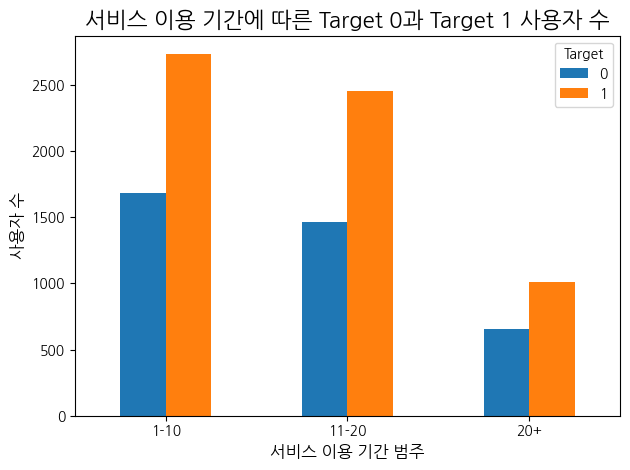

In [276]:
plt.figure(figsize=(10, 6))

# 막대 그래프 생성
grouped_bin_data.plot(kind='bar', stacked=False)

# 그래프 제목과 레이블 설정
plt.title('서비스 이용 기간에 따른 Target 0과 Target 1 사용자 수', fontsize=16)
plt.xlabel('서비스 이용 기간 범주', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)

# 레전드 추가
plt.legend(title='Target', labels=['0', '1'])

# 그래프 표시
plt.xticks(rotation=0)  # x축 레이블 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [248]:
# subscription_duration을 기준으로 그룹화하여 target에 따른 사용자 수 세기
grouped_data = selected_columns_data.groupby(['subscription_duration', 'target']).size().unstack(fill_value=0)
grouped_data.columns = ['Target 0 Count', 'Target 1 Count']
grouped_data

,Target 0 Count,Target 1 Count
subscription_duration,,
1,172,264
2,159,284
3,128,280
4,181,294
5,169,255
6,195,276
7,158,274
8,183,255
9,172,268


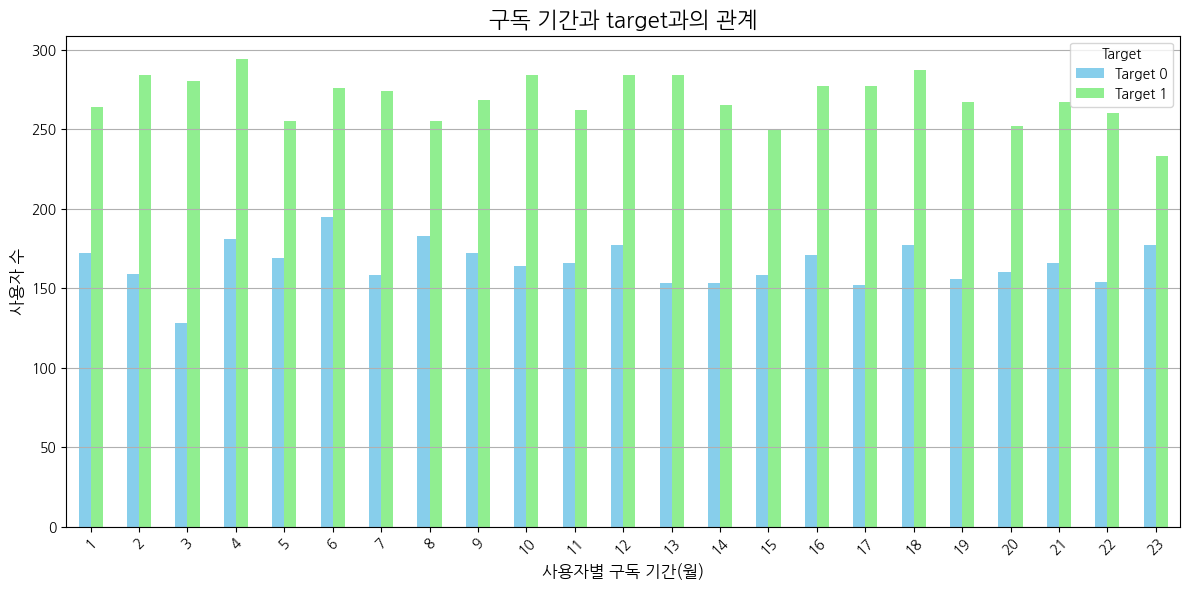

In [244]:
grouped_data.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen'])

plt.title('구독 기간과 target과의 관계', fontsize=16)
plt.xlabel('사용자별 구독 기간(월)', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Target 0', 'Target 1'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [250]:
grouped_2_data = selected_columns_data.groupby(['monthly_active_learning_days', 'target']).size().unstack(fill_value=0)
grouped_2_data.columns = ['Target 0 Count', 'Target 1 Count']
grouped_2_data

,Target 0 Count,Target 1 Count
monthly_active_learning_days,,
1,132,263
2,154,243
3,158,254
4,177,269
5,167,256
6,158,248
7,162,260
8,168,284
9,162,253


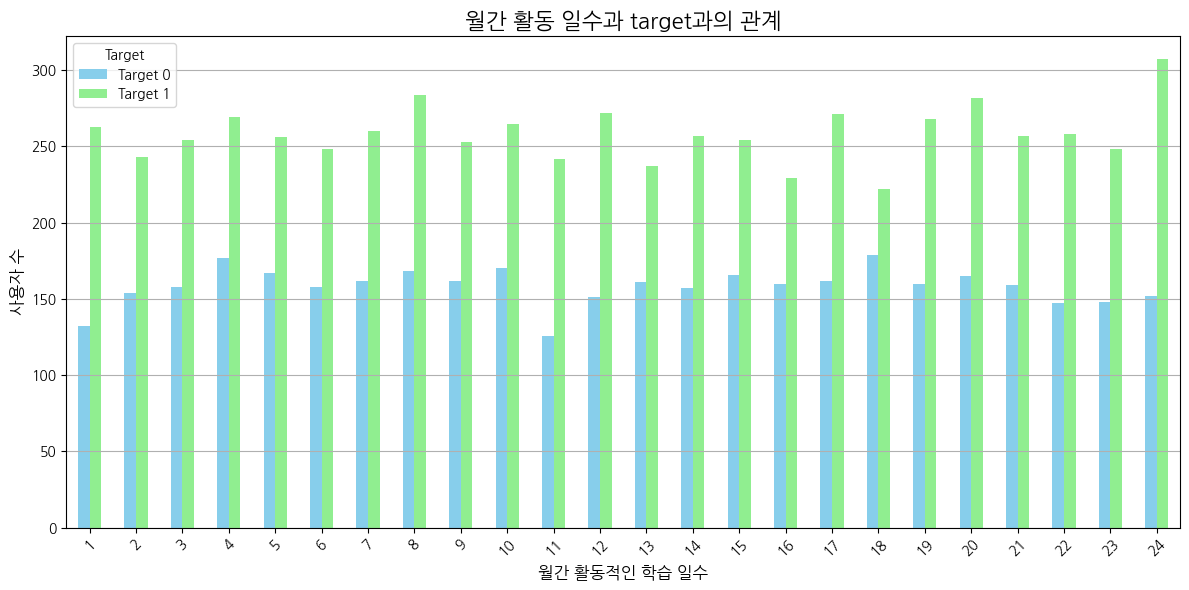

In [252]:
grouped_2_data.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen'])

plt.title('월간 활동 일수과 target과의 관계', fontsize=16)
plt.xlabel('월간 활동적인 학습 일수', fontsize=12)
plt.ylabel('사용자 수', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Target 0', 'Target 1'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

월간 활동 일수의 max값인 24에서 target 1 의 수가 가장 많지만 딱히 의미있는 데이터로 보이지는 않음. 

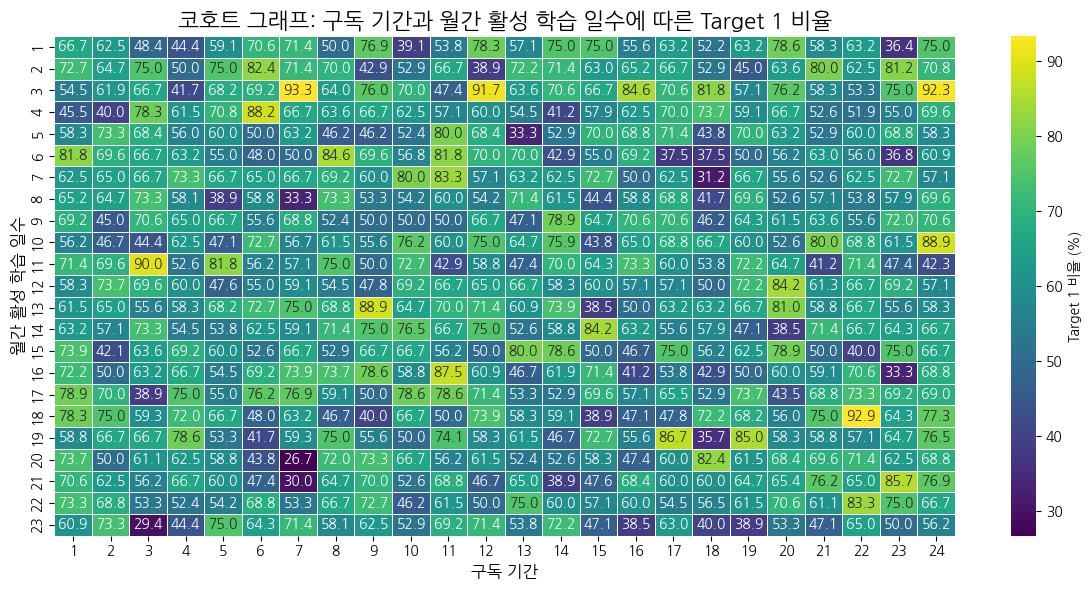

In [268]:
# 사용자의 비율을 계산하기 위한 데이터 준비

cohort_data = access_data.groupby(['subscription_duration', 'monthly_active_learning_days'])['target'].mean().reset_index()

# target 비율을 백분율로 변환
cohort_data['target_ratio'] = cohort_data['target'] * 100

# 피벗 테이블 생성
pivot_table = cohort_data.pivot(index='subscription_duration', columns='monthly_active_learning_days', values='target_ratio')

# 히트맵 생성
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, 
            annot=True,  # 각 셀에 값 표시
            fmt='.1f',   # 소수점 1자리로 표시
            cmap='viridis',  # 색상 맵
            cbar_kws={'label': 'Target 1 비율 (%)'},  # 색상 바 레이블
            linewidths=.5)  # 셀 간격

# 그래프 제목과 축 레이블 설정
plt.title('코호트 그래프: 구독 기간과 월간 활성 학습 일수에 따른 Target 1 비율', fontsize=16)
plt.xlabel('구독 기간', fontsize=12)
plt.ylabel('월간 활성 학습 일수', fontsize=12)

plt.tight_layout()
plt.show()